# Plotting Notebook
Plots of the different model trainings are made for the report.

# 00 Imports

In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import datetime

from dataloader import dataloader
from predicter import Predicter, Predicter_norm
import tensorflow as tf

# Matplot Setup
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.max_open_warning'] = 40
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (50,10)
plt.rcParams['lines.linewidth']= 1

%autoreload 2

2022-01-29 14:55:08.616175: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/melodic/lib
2022-01-29 14:55:08.616219: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
UsageError: Line magic function `%autoreload` not found.


# 01 Load Model paths and one state dict

In [2]:
models_files = sorted(os.listdir('models'))
if models_files[-1] == 'tflite_temp':
    models_files = models_files[:-1]
print(f'Available models:')
for num, m in enumerate(models_files):
    print(f'\t{num}: {m}')

Available models:
	0: 20220125-230532_lmt_1
	1: 20220126-010629_lmt_2
	2: 20220126-020244_magnetic_a
	3: 20220126-112245_magnetic_b
	4: 20220126-150702_lmt_2


In [4]:
mods =[models_files[0], models_files[4], models_files[2]]
mods

['20220125-230532_lmt_1',
 '20220126-150702_lmt_2',
 '20220126-020244_magnetic_a']

In [5]:
sds = []
for m in mods:
    p_pickle = rf'models/{m}/{m}_dict.pickle'
    with open(p_pickle, 'rb') as f:
        sds.append(pickle.load(f))

2022-01-29 14:55:28.485533: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-01-29 14:55:28.485584: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yoga): /proc/driver/nvidia/version does not exist
2022-01-29 14:55:28.485896: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
h0 = sds[0]['history']
h1 = sds[1]['history']
h2 = sds[2]['history']

### MAE over Training Epoch

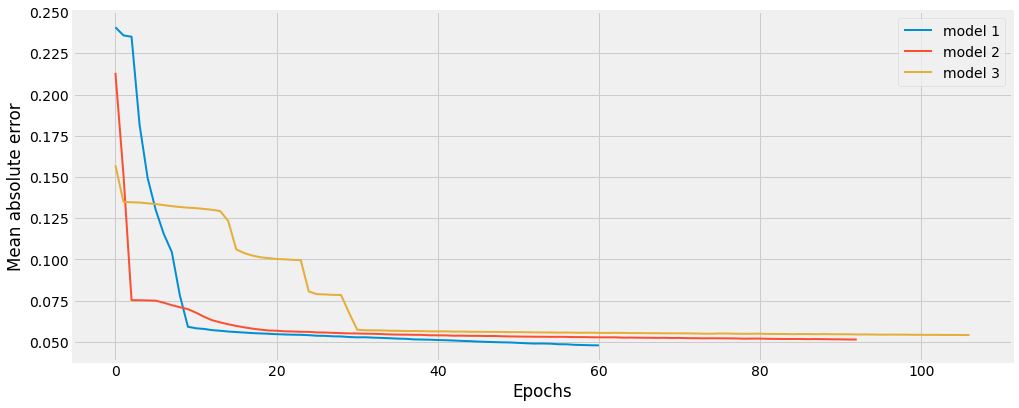

In [128]:
plt.rcParams['figure.figsize'] = (15,6)
plt.plot(h0.history['loss'], label='model 1', linewidth = 2)
plt.plot(h1.history['loss'], label='model 2', linewidth = 2)
plt.plot(h2.history['loss'], label='model 3', linewidth = 2)
plt.xlabel('Epochs')
plt.ylabel('Mean absolute error')
plt.legend()

### Accuracies over Training Epochs

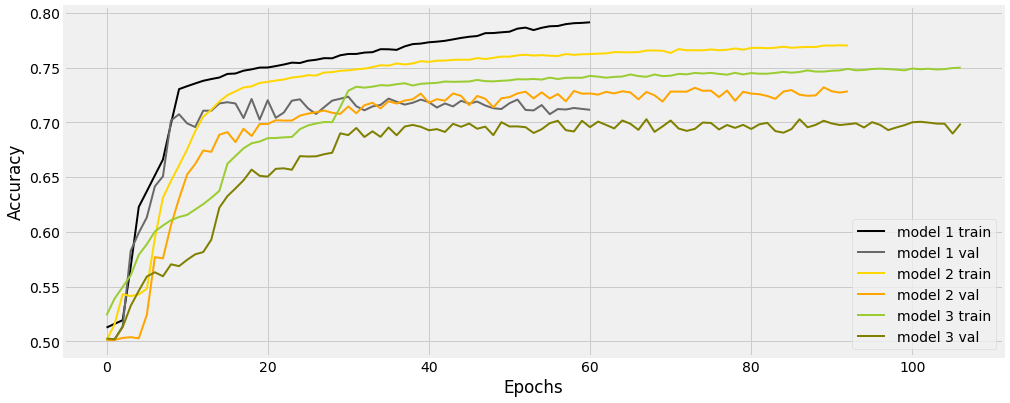

In [129]:
plt.rcParams['figure.figsize'] = (15,6)
plt.plot(h0.history['acc'], label='model 1 train', linewidth = 2, color = 'black')
plt.plot(h0.history['val_acc'], label='model 1 val', linewidth = 2, color = 'dimgrey')
plt.plot(h1.history['acc'], label='model 2 train', linewidth = 2, color='gold')
plt.plot(h1.history['val_acc'], label='model 2 val', linewidth = 2, color = 'orange')
plt.plot(h2.history['acc'], label='model 3 train', linewidth = 2, color = 'yellowgreen')
plt.plot(h2.history['val_acc'], label='model 3 val', linewidth = 2, color ='olive')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Traing and Validation Accuracies for the three models

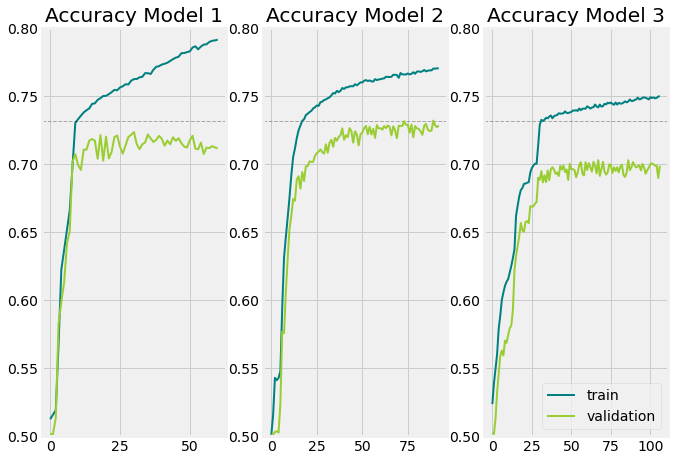

In [97]:
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = (1,1,1,0)


f, ax = plt.subplots(1,3)
ax[0].plot(h0.history['acc'], label='train', linewidth = 2, color = 'teal')
ax[0].plot(h0.history['val_acc'], label='validation', linewidth = 2, color = 'yellowgreen')
ax[0].set_ylim([0.5,0.8])
ax[0].set_title('Accuracy Model 1')
ax[0].set_xticks([0,25,50])
#ax[0].legend()
ax[0].axhline(.732, color = 'black', linestyle='--',alpha = .3)
ax[1].axhline(.732, color = 'black', linestyle='--',alpha = .3)
ax[2].axhline(.732, color = 'black', linestyle='--',alpha = .3)
ax[1].plot(h1.history['acc'], label='train', linewidth = 2, color = 'teal')
ax[1].plot(h1.history['val_acc'], label='validation', linewidth = 2, color = 'yellowgreen')
ax[1].set_title('Accuracy Model 2')
ax[1].set_ylim([0.5,0.8])
ax[1].set_xticks([0,25,50,75])
#ax[1].legend()
ax[2].plot(h2.history['acc'], label='train', linewidth = 2, color = 'teal')
ax[2].plot(h2.history['val_acc'], label='validation', linewidth = 2, color = 'yellowgreen')
ax[2].set_ylim([0.5,0.8])
ax[2].set_title('Accuracy Model 3')
ax[2].set_xticks([0,25,50,75,100])
plt.legend(loc='lower right')

### Training and Validation Losses for the 3 models

('lmt_1', 'lmt_2', 'magnetic_a')

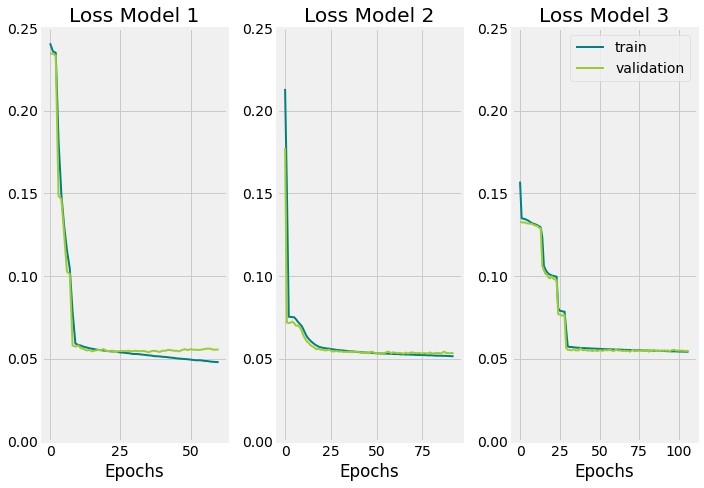

In [106]:
plt.rcParams['figure.facecolor'] = (1,1,1,0)
plt.rcParams['figure.figsize'] = (10,7)
f, ax = plt.subplots(1,3)
ax[0].plot(h0.history['loss'], label='train', linewidth = 2, color = 'teal')
ax[0].plot(h0.history['val_loss'], label='validation', linewidth = 2, color = 'yellowgreen')
ax[0].set_ylim([0,0.25])
ax[0].set_title('Loss Model 1')
#ax[0].legend()
ax[0].set_xlabel('Epochs')

ax[1].plot(h1.history['loss'], label='train', linewidth = 2, color = 'teal')
ax[1].plot(h1.history['val_loss'], label='validation', linewidth = 2, color = 'yellowgreen')
ax[1].set_title('Loss Model 2')
ax[1].set_ylim([0,0.25])
#ax[1].legend()
ax[1].set_xlabel('Epochs')

ax[2].plot(h2.history['loss'], label='train', linewidth = 2, color = 'teal')
ax[2].plot(h2.history['val_loss'], label='validation', linewidth = 2, color = 'yellowgreen')
ax[2].set_ylim([0,0.25])
ax[2].set_title('Loss Model 3')
ax[2].set_xlabel('Epochs')
ax[2].legend()
#plt.legend(loc='lower right')
ax[0].set_xticks([0,25,50])
ax[1].set_xticks([0,25,50,75])
ax[2].set_xticks([0,25,50,75,100])
plt.tight_layout()

sds[0]['model_ident'], sds[1]['model_ident'], sds[2]['model_ident']


## Plots for individual Signal predictions

In [7]:
sd = sds[0]
# Load Data
data = dataloader(sd['data_path'], win_len = sd['win_len'], target_len = sd['target_len'], stride = sd['stride'], feature_params= sd['f_params'], 
                  target_params= sd['t_params'], test_split=0.08, val_split=0.08, seed=sd['seed'], downsample_rate=sd['downsample_rate'], stack=True)

# Get Normalization Functions
def normalize(X, bounds = (-.2,.2), minus = False):
    """"
    Scales all signals in X to be between [0,1] or [-1,1] (if minus=True)
    :param X: Input Array
    :param bounds: Tuple of min and max values for scaling
    :param minus: If true, scales output between [-1, 1]
    """
    if bounds:
        min = bounds[0]
        max = bounds[1]
    else:
        min = np.amin(X)
        max = np.amax(X)
    #print(min, max)
    if minus:
        X_minmax = 2*(X - min) / (max-min)-1
        a = X_minmax > 1
        b = X_minmax < -1
        X_minmax[a] = 1
        X_minmax[b] = -1
    else:
        X_minmax = (X - min) / (max-min)
        a = X_minmax > 1
        b = X_minmax < 0
        X_minmax[a] = 1
        X_minmax[b] = 0
    return X_minmax

X_train = normalize(data['X_train'])
y_train = normalize(data['y_train'])
X_val = normalize(data['X_val'])
y_val = normalize(data['y_val'])
X_test = normalize(data['X_test'])
y_test = normalize(data['y_test'])
sample_rate = data['sample_rate']

['2021-11-26-20-14-48_wobble_interpolated_120Hz.pickle', '2021-11-26-20-01-52_wobble_interpolated_120Hz.pickle', '2022-01-20-15-38-51_wobble_interpolated_120Hz.pickle', '2022-01-13-18-02-22_wobble_interpolated_120Hz.pickle', '2021-11-26-20-05-14_wobble_interpolated_120Hz.pickle', '2022-01-20-15-23-37_wobble_interpolated_120Hz.pickle', '2022-01-13-17-48-10_wobble_interpolated_120Hz.pickle', '2022-01-13-17-18-38_wobble_interpolated_120Hz.pickle', '2022-01-13-17-34-38_wobble_interpolated_120Hz.pickle']
2021-11-26-20-14-48_wobble_interpolated_120Hz.pickle
Downsampling Dictionary to 10Hz
Converted Signals: ['orientation.x', 'orientation.y', 'orientation.z', 'orientation.w', 'angular_velocity.x', 'angular_velocity.y', 'angular_velocity.z', 'linear_acceleration.x', 'linear_acceleration.y', 'linear_acceleration.z', 'position_0', 'position_1', 'position_0_status', 'position_1_status'].
	Before: Duration: 400.775s. Avg Sample Rate: 120.000/s. Number of samples: 48093.
	After: Duration: 400.700s.

In [8]:
# Load Keras Models
keras_Ps = []
for m in mods:
    print(m)
    keras_path = f'models/{m}/{m}.h5'
    keras_Ps.append(tf.keras.models.load_model(keras_path))

20220125-230532_lmt_1
20220126-150702_lmt_2
20220126-020244_magnetic_a


In [25]:
# Predict all sets from all models
p_tr = []
p_va = []
p_te = []
for p in keras_Ps:
    p_tr.append(p.predict(X_train))
    p_va.append(p.predict(X_val))
    p_te.append(p.predict(X_test))

### Comparison Plot

Text(0.5, 1.0, 'Predictions on Test set sample')

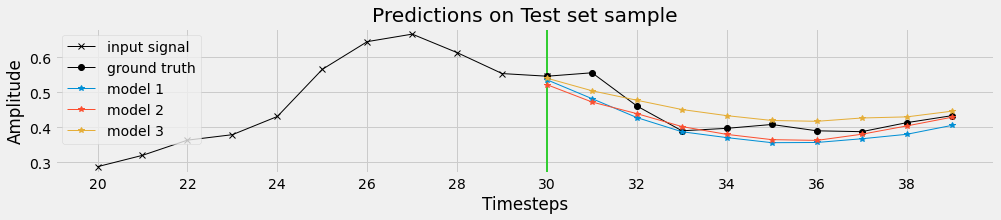

In [64]:
plt.rcParams['figure.figsize'] = (15,2.5)
plt.rcParams['lines.linewidth']= 1

idx = 450
x_1 = np.array(range(20,31))
x_2 = np.array(range(30,40))
plt.plot(x_1,np.hstack([X_test[idx,20:,0],y_test[idx,0,0]]), marker = 'x', color ='black', label='input signal')
plt.axvline(30, color = 'limegreen', linewidth=2)
plt.plot(x_2, y_test[idx,:,0], marker='o', label='ground truth', color = 'black')
plt.xticks(range(20,40,2))
plt.xlabel('Timesteps')
plt.ylabel('Amplitude')

plt.plot(x_2, p_te[0][idx,:,0], marker='*', label='model 1')
plt.plot(x_2, p_te[1][idx,:,0], marker='*', label='model 2')
plt.plot(x_2, p_te[2][idx,:,0], marker='*', label='model 3')
plt.legend()
plt.title('Predictions on Test set sample')


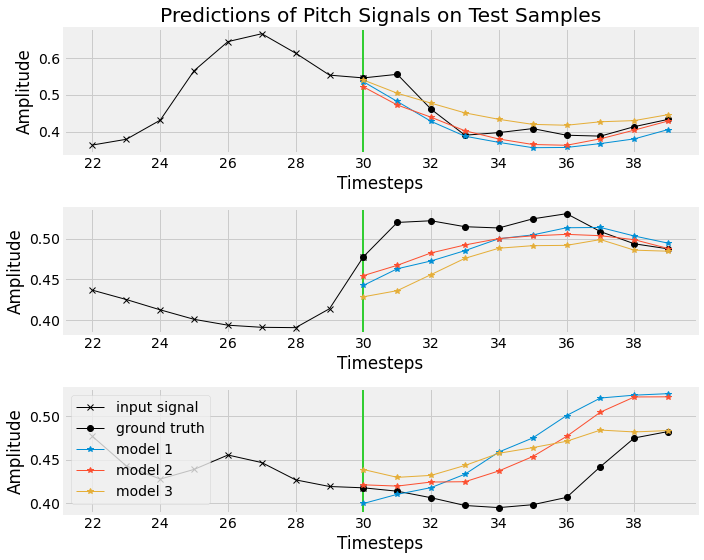

In [91]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['lines.linewidth']= 1
plt.rcParams['figure.facecolor'] = (1,1,1,0)
fig, axis = plt.subplots(3,1)
plt.subplot(3,1,1)

st = 22

idx = 450
x_1 = np.array(range(st,31))
x_2 = np.array(range(30,40))
plt.plot(x_1,np.hstack([X_test[idx,st:,0],y_test[idx,0,0]]), marker = 'x', color ='black', label='input signal')
plt.axvline(30, color = 'limegreen', linewidth=2)
plt.plot(x_2, y_test[idx,:,0], marker='o', label='ground truth', color = 'black')
plt.xticks(range(st,40,2))
plt.xlabel('Timesteps')
plt.ylabel('Amplitude')

plt.plot(x_2, p_te[0][idx,:,0], marker='*', label='model 1')
plt.plot(x_2, p_te[1][idx,:,0], marker='*', label='model 2')
plt.plot(x_2, p_te[2][idx,:,0], marker='*', label='model 3')
#plt.legend()
plt.title('Predictions of Pitch Signals on Test Samples')

plt.subplot(3,1,2)
idx = 1850
x_1 = np.array(range(st,31))
x_2 = np.array(range(30,40))
plt.plot(x_1,np.hstack([X_test[idx,st:,0],y_test[idx,0,0]]), marker = 'x', color ='black', label='input signal')
plt.axvline(30, color = 'limegreen', linewidth=2)
plt.plot(x_2, y_test[idx,:,0], marker='o', label='ground truth', color = 'black')
plt.xticks(range(st,40,2))
plt.xlabel('Timesteps')
plt.ylabel('Amplitude')

plt.plot(x_2, p_te[0][idx,:,0], marker='*', label='model 1')
plt.plot(x_2, p_te[1][idx,:,0], marker='*', label='model 2')
plt.plot(x_2, p_te[2][idx,:,0], marker='*', label='model 3')

plt.subplot(3,1,3)
idx = -10
x_1 = np.array(range(st,31))
x_2 = np.array(range(30,40))
plt.plot(x_1,np.hstack([X_test[idx,st:,0],y_test[idx,0,0]]), marker = 'x', color ='black', label='input signal')
plt.axvline(30, color = 'limegreen', linewidth=2)
plt.plot(x_2, y_test[idx,:,0], marker='o', label='ground truth', color = 'black')
plt.xticks(range(st,40,2))
plt.xlabel('Timesteps')
plt.ylabel('Amplitude')

plt.plot(x_2, p_te[0][idx,:,0], marker='*', label='model 1')
plt.plot(x_2, p_te[1][idx,:,0], marker='*', label='model 2')
plt.plot(x_2, p_te[2][idx,:,0], marker='*', label='model 3')
plt.legend()
plt.tight_layout()

### Calculate MAE in Angles for each model on all sets

In [118]:
maes = []
m = tf.keras.metrics.MeanAbsoluteError()
for p in keras_Ps:
    p_tr = p.predict(X_train)
    p_va = p.predict(X_val)
    p_te = p.predict(X_test)

    
    m.update_state(y_train, p_tr)
    tr_acc = m.result().numpy()
    m.reset_state()
    
    m.update_state(y_val, p_va)
    va_acc = m.result().numpy()
    m.reset_state()

    m.update_state(y_test, p_te)
    te_acc = m.result().numpy()
    m.reset_state()
    maes.append([tr_acc, va_acc, te_acc])

print(maes)

[[0.04387662, 0.05556229, 0.054988932], [0.05310564, 0.05460589, 0.052666932], [0.050264053, 0.05269157, 0.050631218]]


In [123]:
# Calculate MAE in Angles
for a in maes:
    for v in a:
        print(v*0.4/(2*np.pi)*360)

1.0055780581197191
1.2733938868327757
1.2602534894127508
1.21709161613645
1.2514748134222506
1.207037169401
1.1519672392487539
1.2076018307672571
1.1603820412027221
